<a href="https://colab.research.google.com/github/SubhankarSamanta295/Dreesing_Item_Detection_DL/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import keras
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()


In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

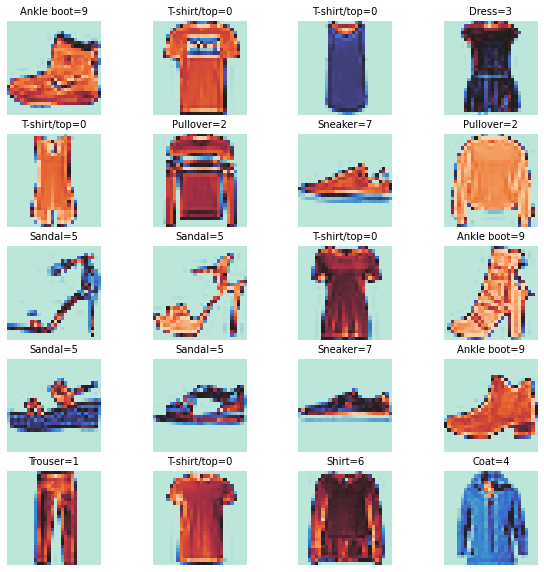

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(x_train[i],cmap="icefire")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=10)

In [ ]:
# Feature Scaling
x_train = x_train/255
x_test = x_test/255


#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

Build Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(units=100,activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(units=80,activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(units=60,activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(units=10,activation='softmax')
])                        
                                           

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 80)                8080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 60)                4860      
_________________________________________________________________
dropout_8 (Dropout)          (None, 60)               

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=500,batch_size=100)

Epoch 1/500
600/600 [==============================] - 3s 4ms/step - loss: 1.1604 - accuracy: 0.5789
Epoch 2/500
600/600 [==============================] - 2s 4ms/step - loss: 0.5405 - accuracy: 0.8116
Epoch 3/500
600/600 [==============================] - 2s 4ms/step - loss: 0.4814 - accuracy: 0.8333
Epoch 4/500
600/600 [==============================] - 2s 4ms/step - loss: 0.4405 - accuracy: 0.8450
Epoch 5/500
600/600 [==============================] - 2s 4ms/step - loss: 0.4261 - accuracy: 0.8480
Epoch 6/500
600/600 [==============================] - 2s 4ms/step - loss: 0.4118 - accuracy: 0.8539
Epoch 7/500
600/600 [==============================] - 2s 4ms/step - loss: 0.3977 - accuracy: 0.8600
Epoch 8/500
600/600 [==============================] - 2s 4ms/step - loss: 0.3875 - accuracy: 0.8616
Epoch 9/500
600/600 [==============================] - 2s 4ms/step - loss: 0.3799 - accuracy: 0.8644
Epoch 10/500
600/600 [==============================] - 2s 4ms/step - loss: 0.3751 - accura

Evaluation of model

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4462 - accuracy: 0.8843


[0.44617733359336853, 0.8842999935150146]

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[0].round(2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

9

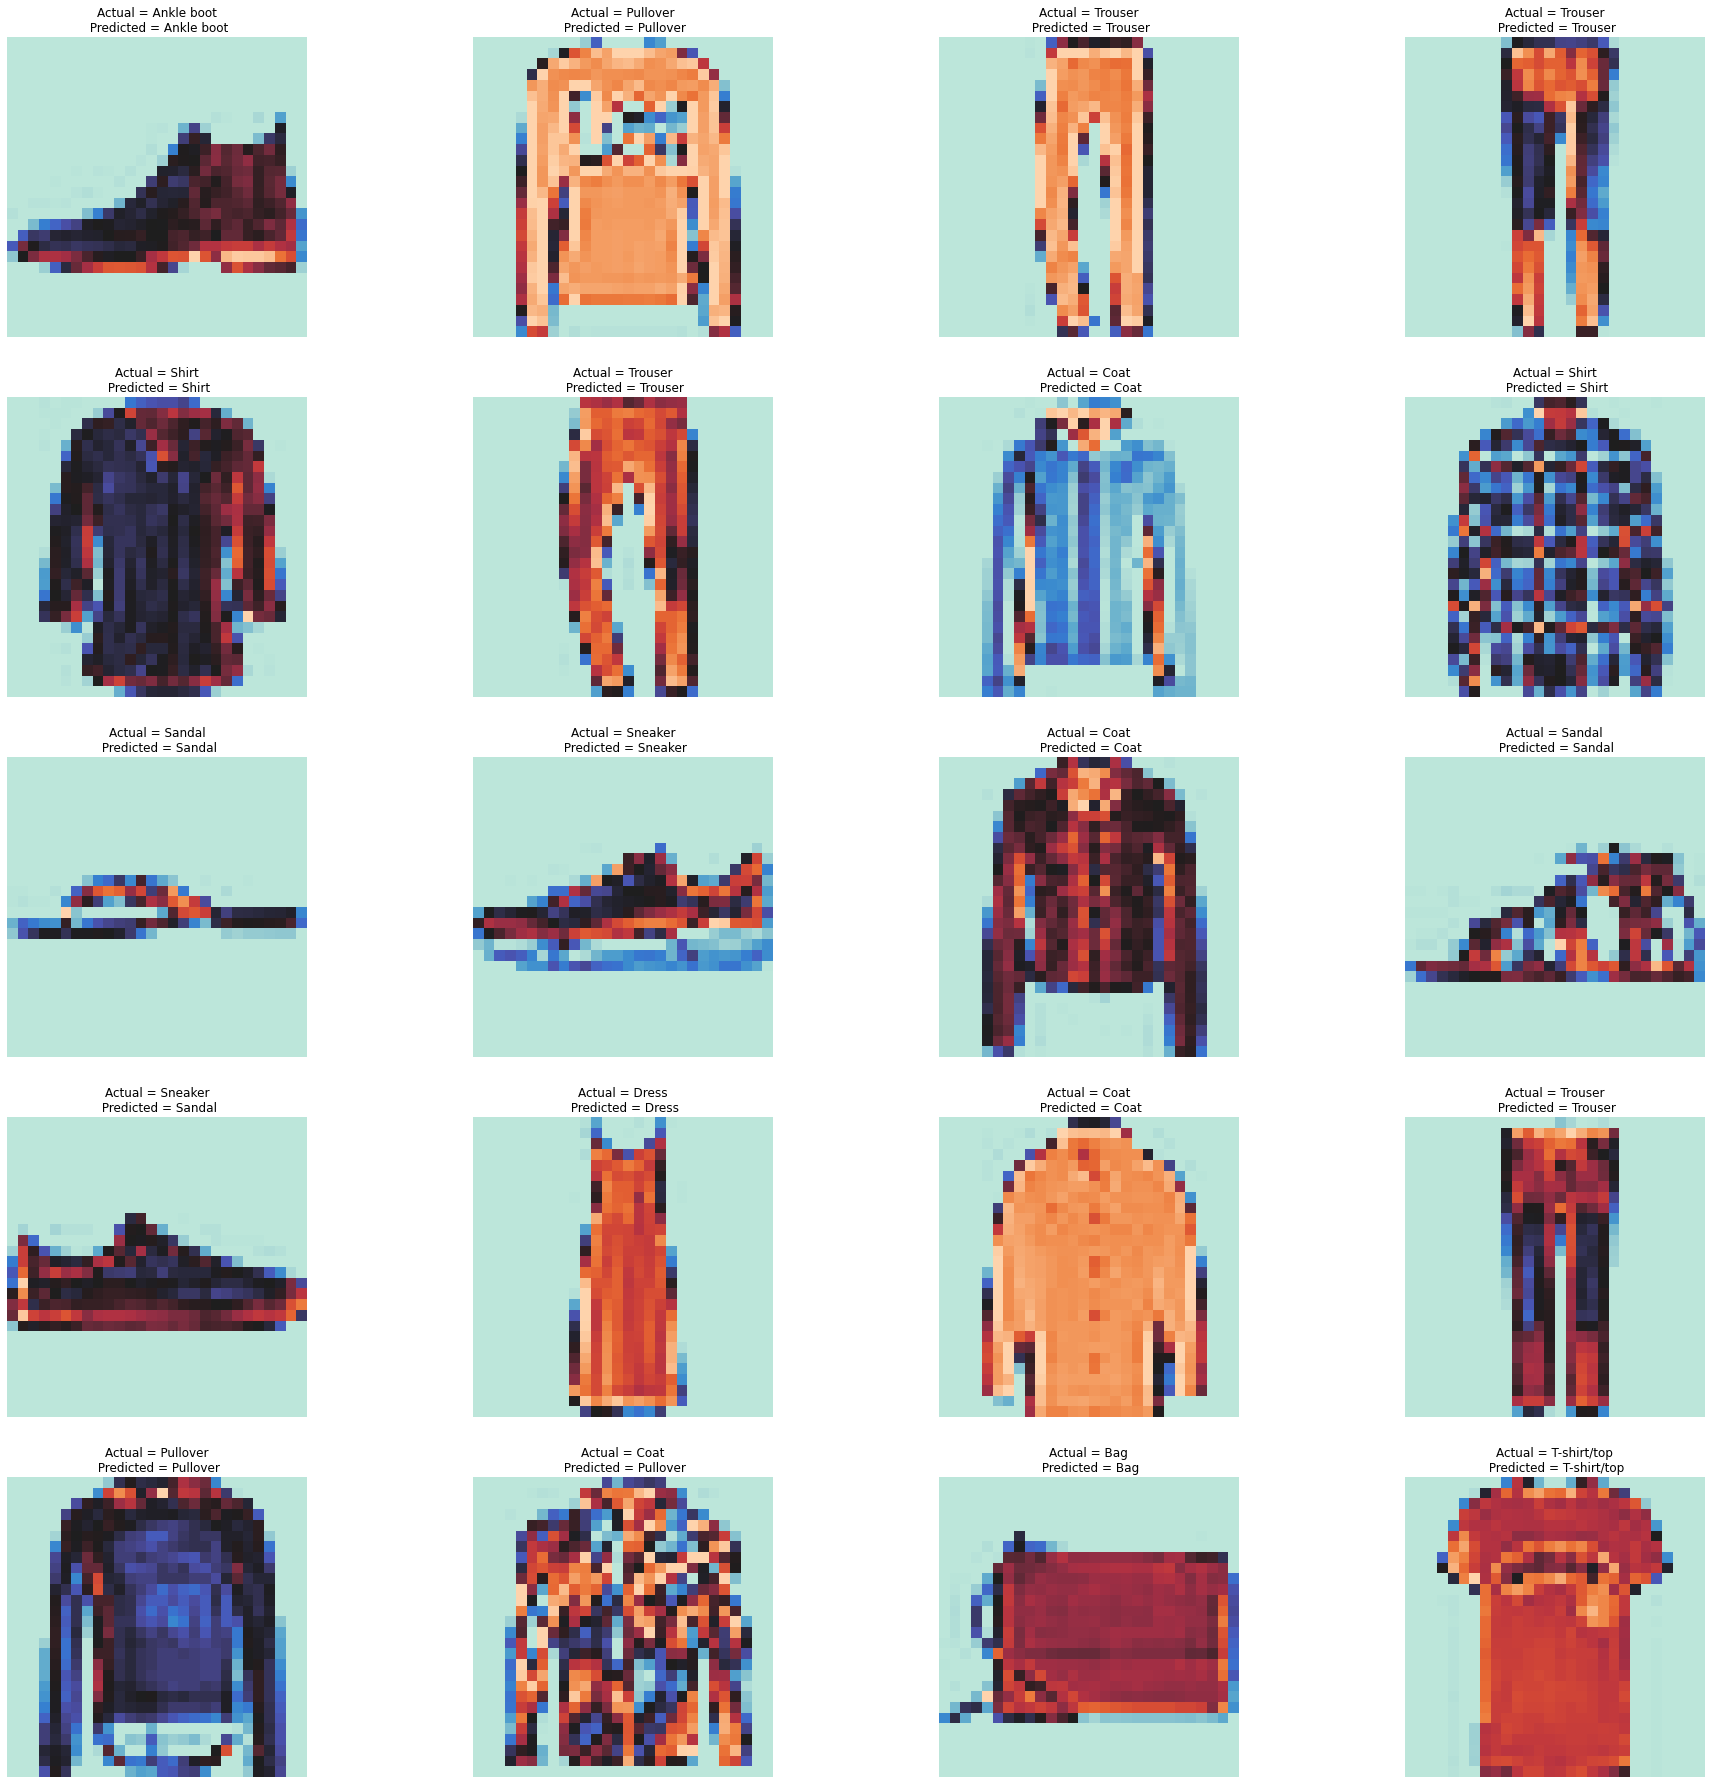

In [ ]:
plt.figure(figsize=(32,32))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(x_test[i],cmap="icefire")
  plt.axis('off')
  plt.title("Actual = {}\n Predicted = {}".format(class_labels[y_test[i]],class_labels[np.argmax(y_pred[i])]))